In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Load and clean data
df = pd.read_csv("/content/drive/MyDrive/Data Set/iris.csv")
df = df.drop_duplicates()


In [ ]:
# EDA
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Data types:\n", df.dtypes)
print("Summary:\n", df.describe(include='all'))

Shape: (147, 5)
Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Summary:
         sepal_length  sepal_width  petal_length  petal_width     species
count     147.000000   147.000000    147.000000   147.000000         147
unique           NaN          NaN           NaN          NaN           3
top              NaN          NaN           NaN          NaN  versicolor
freq             NaN          NaN           NaN          NaN          50
mean        5.856463     3.055782      3.780272     1.208844         NaN
std         0.829100     0.437009      1.759111     0.757874         NaN
min         4.300000     2.000000      1.000000     0.100000         NaN
25%         5.100000     2.800000      1.600000     0.300000         NaN
50%         5.800000     3.000000      4.400000   

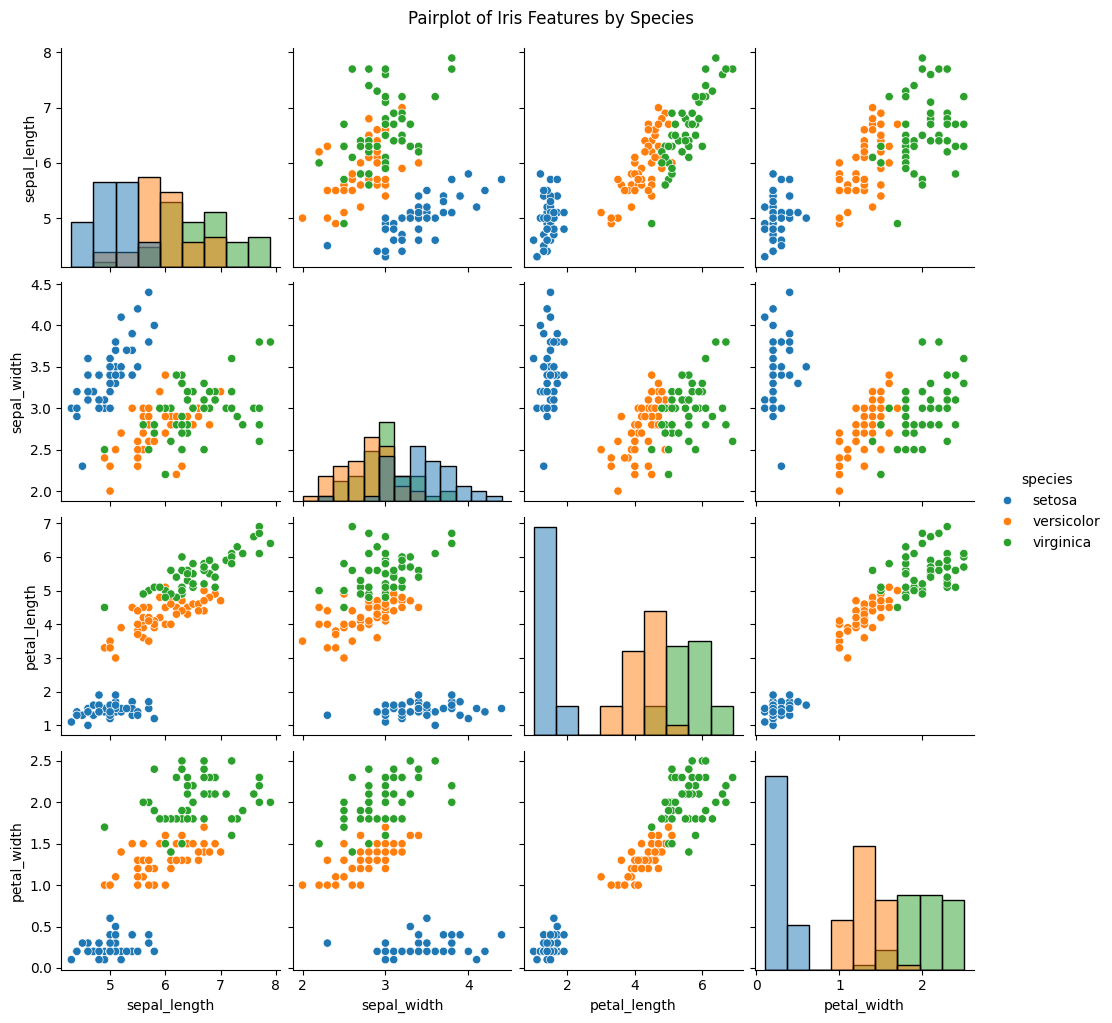

In [ ]:
# Pairplot
sns.pairplot(df, hue="species", diag_kind="hist")
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()

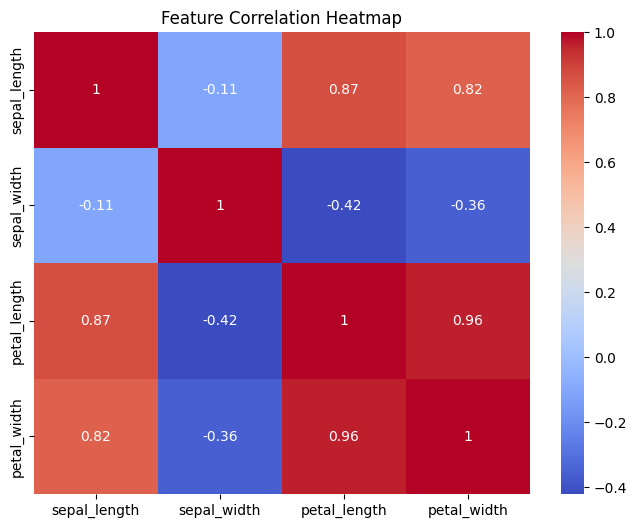

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

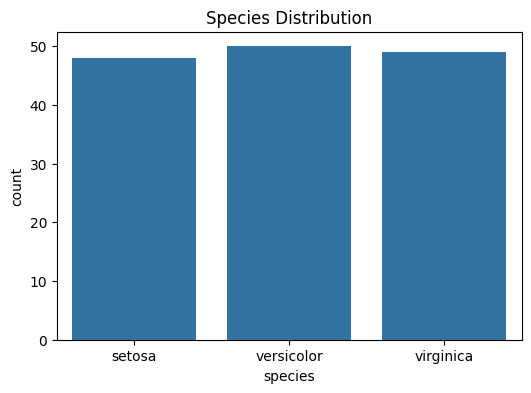

In [ ]:
# Species distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="species")
plt.title("Species Distribution")
plt.show()

In [ ]:
# Standardize features
features = df.drop("species", axis=1)
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

In [ ]:
# PCA and t-SNE
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(scaled)

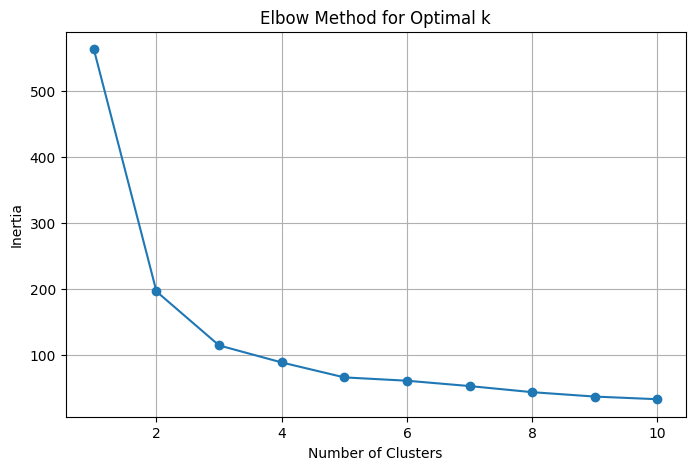

In [ ]:
# k-Means (elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [ ]:
# Apply k-Means with k=3 (as elbow usually shows 3)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(pca_data)


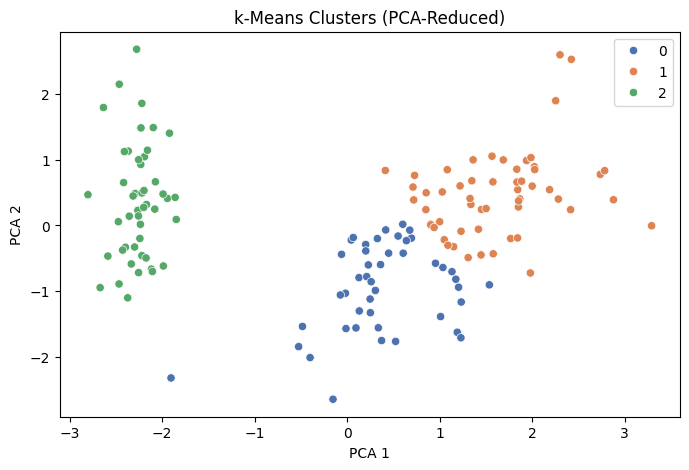

In [ ]:
# Plot clustered PCA
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette="deep")
plt.title("k-Means Clusters (PCA-Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


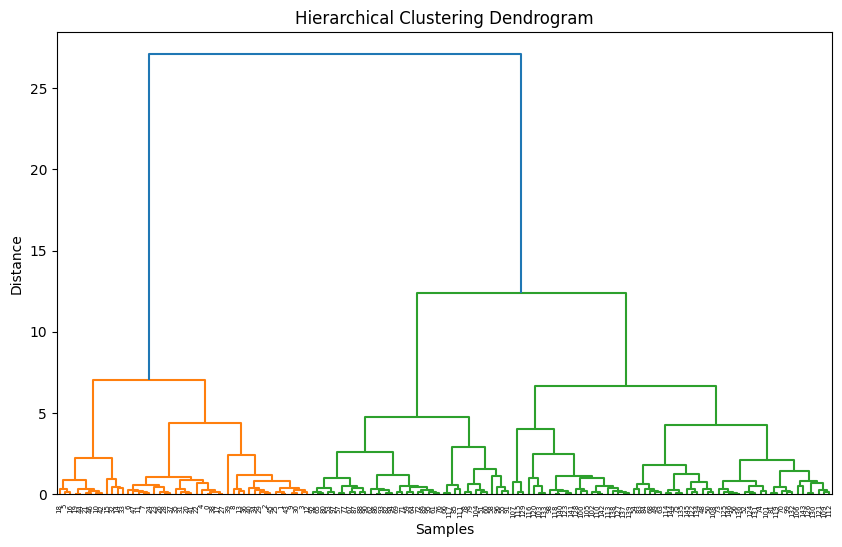

In [ ]:

# Hierarchical clustering (dendrogram)
linkage_matrix = linkage(pca_data, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

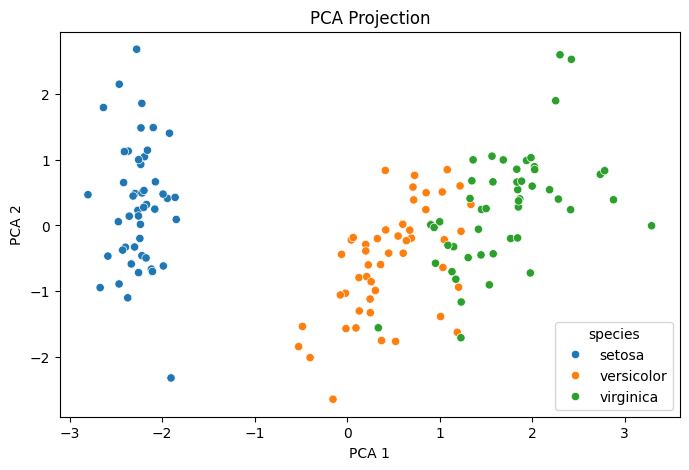

In [ ]:
# PCA scatter
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df["species"])
plt.title("PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

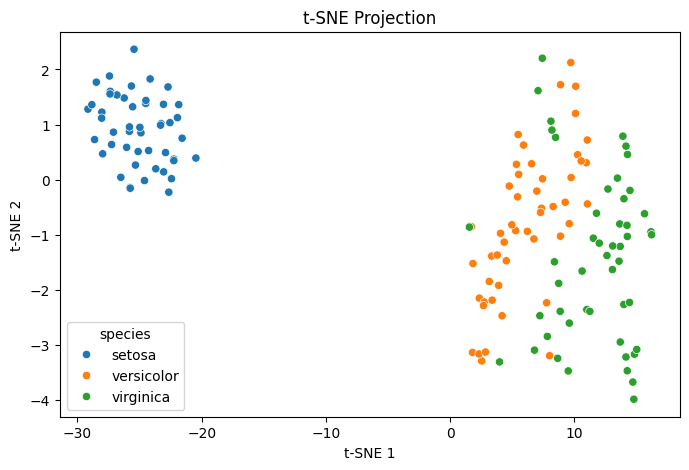

In [ ]:
# t-SNE scatter
plt.figure(figsize=(8, 5))
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], hue=df["species"])
plt.title("t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [ ]:
# Summary and applications
print("\n Clustering Summary:")
print(f"Number of clusters found (k): {len(set(labels))}")
print("Clustering separates species quite well using PCA and t-SNE.")

print("\n Real-world Applications of Clustering:")
print("- Customer segmentation in marketing")
print("- Document or news article grouping")
print("- Image compression and color quantization")
print("- Anomaly detection in network security")
print("- Grouping genes with similar expression patterns")


 Clustering Summary:
Number of clusters found (k): 3
Clustering separates species quite well using PCA and t-SNE.

 Real-world Applications of Clustering:
- Customer segmentation in marketing
- Document or news article grouping
- Image compression and color quantization
- Anomaly detection in network security
- Grouping genes with similar expression patterns
